In [1]:
import numpy as np
import scipy.optimize as fitter
import matplotlib.pyplot as plt

### Resistivity

In [2]:
data = np.loadtxt('tungsten_resistivity.txt', dtype=str, delimiter=' ', )
#Temp is column 1, kelvin
#Resistivity is column 2, micro-ohm / cm

In [3]:
def rho(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2

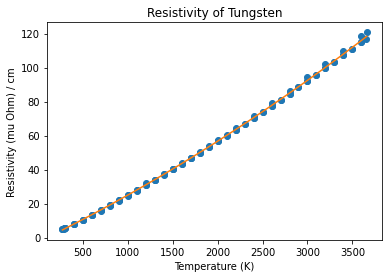

In [4]:
temperature = data[:,1].astype(float)
resistivity = data[:,2]
for i in range(resistivity.shape[0]):
    resistivity[i] = resistivity[i].strip().replace(',','.')
resistivity = np.array(resistivity, dtype='float')
plt.plot(temperature,resistivity, 'o')
plt.title('Resistivity of Tungsten')
plt.ylabel('Resistivity (mu Ohm) / cm')
plt.xlabel('Temperature (K)')

resistivityPar, resistivityCov = fitter.curve_fit(rho, temperature, resistivity)
x = np.linspace(min(temperature),max(temperature), 1000)
plt.plot(x,rho(x,resistivityPar[0],resistivityPar[1], resistivityPar[2]));

### Thermal Expansion

c:\users\max\python\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


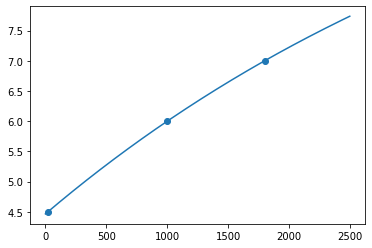

In [5]:
expansion = np.array([[20, 1000, 1800], [4.5, 6, 7]])
plt.scatter(expansion[0],expansion[1])
def fit(x, a0, a1, a2):
    return a0 - a1*np.exp(-x*a2)
expPar, expCov = fitter.curve_fit(fit, expansion[0], expansion[1], [9.2, 4.7, 0.8/2000]);
x = np.linspace(0, 2500, 200)
plt.plot(x,fit(x,expPar[0], expPar[1], expPar[2]));

### Circuit Data

Getting Data to create a fit for voltage to reistance

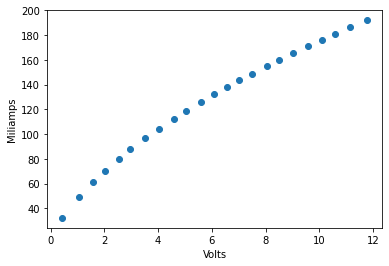

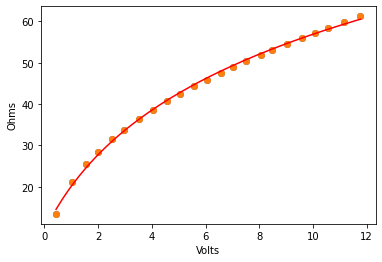

In [6]:
volts = np.array([11.77, 11.15, 10.58, 10.09, 9.59, 9.03, 8.49, 8.07, 7.51, 7.02, 6.56, 6.07, 5.58,
                 5.05, 4.58, 4.03, 3.52, 2.96, 2.526, 2.008, 1.559, 1.041, 0.433]) #volts

amps = np.array([192.1, 186.3, 180.9, 176.1, 171.2, 165.4, 159.8, 155.3, 149.0, 143.4, 138.0, 132.1, 125.8,
                118.9, 112.5, 104.5, 96.8, 87.8, 80.2, 70.5, 61.3, 49.3, 32.2]) #milli amps


#Checked offset and when volts is 0 amps is also 0 :)
plt.scatter(volts, amps)
plt.xlabel('Volts')
plt.ylabel('Miliamps')
plt.show()


plt.scatter(volts, volts/amps*1000)
plt.xlabel('Volts')
plt.ylabel('Ohms')

def rOFv(x, a0, a1, a2):
    return a0+a1*np.log(x-a2)

resistancePar, resistanceCov = fitter.curve_fit(rOFv, volts, volts/amps*1000, [13, 20, -2])

plt.scatter(volts, volts/amps*1000)
x = np.linspace(min(volts),max(volts), 1000)
plt.plot(x,rOFv(x,resistancePar[0],resistancePar[1], resistancePar[2]),color='red');

Collecting data with associated spectrum data

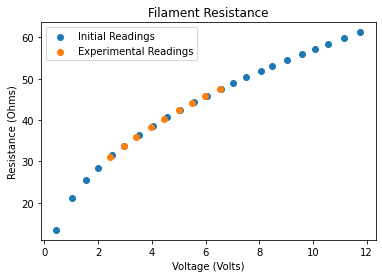

In [7]:
#Data
voltage = np.array([6.53, 5.99, 5.48, 5.02, 4.44, 3.97, 3.41, 2.96, 2.43])
current = np.array([137.5, 130.9, 124.4, 118.3, 110.3, 103.5, 94.8, 87.5, 78.4]) # milliamps
resistance = voltage/current * 1000
#Checking to make sure the intial data collection is a valid baseline
plt.scatter(volts, volts/amps*1000, label='Initial Readings')
plt.scatter(voltage, resistance, label='Experimental Readings');
plt.xlabel('Voltage (Volts)')
plt.ylabel('Resistance (Ohms)')
plt.title('Filament Resistance');
plt.legend()
#plt.savefig('Resistance Readings.png',format='png');

Calculating Filament Dimensions

In [8]:
left = np.array([282, 290, 310, 293, 294])
right = np.array([314, 282, 276, 299, 289])
scaleFactor = (1/64*2.54) / ((left+right)/2).mean() #pixels to cm
scaleErr = ((1/64*2.54) / ((left+right)/2)).std() / np.sqrt(len(left)) #absolute error
print('Scaling Factor: {:.6f} +/- {:.6f} cm/px'.format(scaleFactor, scaleErr))

legs = np.array([[12,11], [14,12], [22,0], [22,1], [17,14]])
hypot = np.linalg.norm(legs, axis=1) #pixels
diameter = hypot.mean() *scaleFactor #cm
t1 = hypot.std() / np.sqrt(len(hypot)) * scaleFactor 
t2 = hypot.mean()*scaleErr
diameterErr = np.sqrt(t1**2 + t2**2)
profile = np.pi*diameter**2/4
profileErr = np.pi*diameterErr**2/4
print('Filament Cross Sectional Area: {:.9f} +/- {:.9f} cm^2'.format(profile,profileErr))


baseResistance = np.array([5.3, 5.4, 5.4]) #OHMs
bRErr = baseResistance.std() / len(baseResistance) #resistance at room temp
temp = 22 + 273
tempErr = 1 

rez = rho(temp,resistivityPar[0],resistivityPar[1], resistivityPar[2]) #resistivity at room temp (function is in micro Ohms)
rezErr = (resistivityPar[1] + 2*resistivityPar[2]*temp) * tempErr

profileLength = profile*baseResistance.mean()/(rez/1e6)
t1 = profileErr*baseResistance.mean()/(rez/1e6)
t2 = profile*bRErr/(rez/1e6)
t3 = profile*baseResistance.mean()/(rez**2/1e6) * rezErr
profileLengthErr = np.sqrt(t1**2 + t2**2 + t3**2)
print('Length of Filament (via resistance): {:.4f} +/- {:.4f} cm'.format(profileLength,profileLengthErr))


#Counting the loops in the wire
coils = 86
coilErr = 2

sweep = np.array([[74, 146], [15,171], [107,124], [122,109], [41,156]])
hypotnuse = np.linalg.norm(sweep, axis = 1).mean()
hErr = np.linalg.norm(sweep, axis = 1).std() / np.sqrt(len(sweep))
sweepLength = np.pi*hypotnuse * scaleFactor * coils
t1 = np.pi*hErr * scaleFactor * coils
t2 = np.pi*hypotnuse * scaleErr * coils
t3 = np.pi*hypotnuse * scaleFactor * coilErr
sweepLengthErr = np.sqrt(t1**2 + t2**2 + t3**2)
print('Length of Filament (via coils): {:.4f} +/- {:.4f} cm'.format(sweepLength,sweepLengthErr))
agreement = np.abs(sweepLength - profileLength) < 2 * np.sqrt(sweepLengthErr**2 + profileLengthErr**2)
print('Sperate Length Calculations Agree: {}'.format(agreement))

length = (sweepLength + profileLength) / 2
lengthErr = np.sqrt((sweepLengthErr/2)**2 + (profileLengthErr/2)**2)
print('Length of Filament: {:.4f} +/- {:.4f} cm'.format(length,lengthErr))

Scaling Factor: 0.000135 +/- 0.000001 cm/px
Filament Cross Sectional Area: 0.000005856 +/- 0.000000017 cm^2
Length of Filament (via resistance): 6.1664 +/- 0.0410 cm
Length of Filament (via coils): 6.0332 +/- 0.1566 cm
Sperate Length Calculations Agree: True
Length of Filament: 6.0998 +/- 0.0809 cm


In [9]:
#Importing Jason's Code
import Capstone_Analysis as CA

(308.15913551525443, 6.926923047983861)


c:\users\max\python\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [10]:
#Ensuring function works for base case
CA.resistance_to_temperature(baseResistance.mean(), length, profile)

(307.02665102475237, 5.416225547423782)

In [11]:
#Reading Spectrum Data
filenames = []
for v in voltage:
    string = 'good_data/'+ str(int(np.floor(v))) + '-' + str(round(v%1,2))[2:]+'_Volts.txt'
    filenames.append(string)
filenames.append('good_data/0_volts_noise.txt')


I = []
for fn in filenames:

    with open(fn, 'r') as file:
        data = file.readlines()
        
        intensities = []

        for i in range(len(data)):

            intensity = data[i].split('\t')
            intensity = intensity[2:]
            intensity[-1] = intensity[-1].strip()
            for j in range(len(intensity)):
                intensity[j] = float(intensity[j])
            intensities.append(intensity)
               
    I.append(np.array(intensities))
WL = np.arange(350e-9,1000.5e-9,1e-9)

#Find highest curve in a given set of intensities
def find_max_curve(intensities):
    large = 0
    index = 0
    for i in range(len(intensities)):
        new = np.max(max(intensities[i]))
        if new > large:
            large = new
            index = i
    return intensities[index]

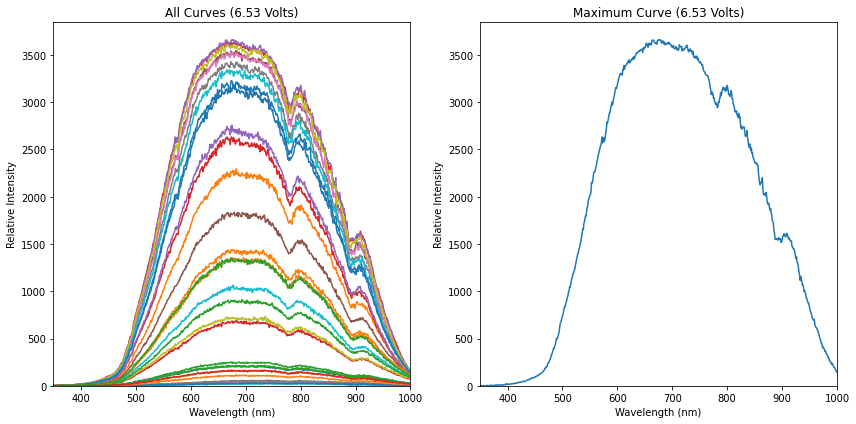

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
for i in range(len(I[0])):
    ax[0].plot(WL*1e9,I[0][i])
ax[0].set_xlabel('Wavelength (nm)')
ax[0].set_ylabel('Relative Intensity')
ax[0].set_title('All Curves (6.53 Volts)')
ax[0].set_xlim(WL[0]*1e9,1000)
ax[0].set_ylim(0,max(find_max_curve(I[0]))*1.05)

ax[1].plot(WL*1e9,find_max_curve(I[0]))
ax[1].set_xlabel('Wavelength (nm)')
ax[1].set_ylabel('Relative Intensity')
ax[1].set_title('Maximum Curve (6.53 Volts)')
ax[1].set_xlim(WL[0]*1e9,1000)
ax[1].set_ylim(0,max(find_max_curve(I[0]))*1.05)
fig.tight_layout()
#plt.savefig('Parsing Example.png',format='png')

In [13]:
def PlancksLaw(wavelength, Temperature):
    h  = 6.62607e-34 #m^2 kg / s
    c  = 2.99792e8   #m / s
    kb = 1.38065e-23 #m^2 kg / s^2 K
    t1 = (2*h*c*c) / (wavelength**5)
    t2 = (h*c) / (wavelength*kb*Temperature)
    t3 = np.exp(t2) - 1
    return t1 / t3

def PlancksTempErr(wavelength, Temperature, TemperatureErr):
    h  = 6.62607e-34 #m^2 kg / s
    c  = 2.99792e8   #m / s
    kb = 1.38065e-23 #m^2 kg / s^2 K
    t1 = (2*h*c*c) / (wavelength**5)
    t2 = (h*c) / (wavelength*kb*Temperature)
    t3 = t2/Temperature*(np.exp(t2) -1)**2
    return (t1 / t3)*TemperatureErr

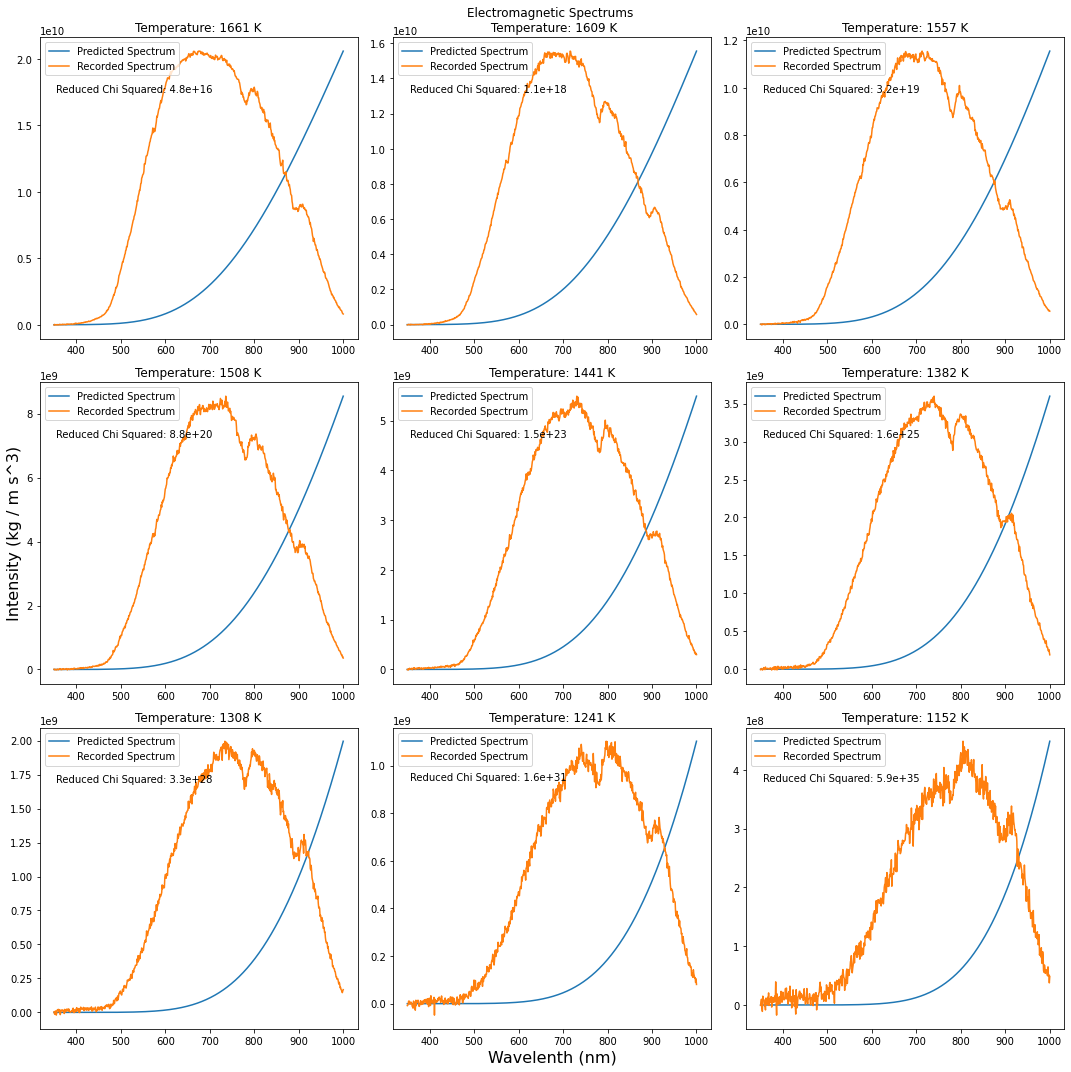

In [14]:
for i in range(len(I)):
    I[i] = find_max_curve(I[i])
    
temps, tempsErr = CA.resistance_to_temperature(resistance, length, profile)
x = np.linspace(1e-9, 2000e-9, 1000)
fig, ax = plt.subplots(3,3,figsize=(15,15))
for i in range(len(I)-1):
    j = i//3
    k = i%3
    y = PlancksLaw(WL, temps[i])
    yPrime = PlancksLaw(WL, temps[i] - tempsErr[i])
    yPrimePrime = PlancksLaw(WL, temps[i] - tempsErr[i])
    ax[j][k].plot(WL*1e9,y, label='Predicted Spectrum')
    ax[j][k].plot(WL*1e9,I[i]*max(y)/max(I[i]), label='Recorded Spectrum')
    ax[j][k].legend(loc='upper left')
    ax[j,k].set_title('Temperature: {:.0f} K'.format(temps[i]))
    
    res = y - I[i]*max(y)/max(I[i])
    resErr = PlancksTempErr(WL,temps[i],tempsErr[i])
    reducedChiS = np.sum((res/resErr)**2) / (len(res) - 2)
    ax[j,k].text(355, max(y)*0.85,'Reduced Chi Squared: {:.1e}'.format(reducedChiS))

ax[2,1].set_xlabel('Wavelenth (nm)',fontsize=16)
ax[1,0].set_ylabel('Intensity (kg / m s^3)',fontsize=16)
ax[0,1].set_title('Electromagnetic Spectrums \n Temperature: {:.0f} K'.format(temps[1]))
fig.tight_layout()
#plt.savefig('Electromagnetic Spectrum.png',facecolor='w',format='png')

(-500000000.0, 20996207076.787647)

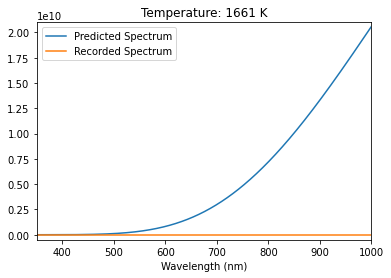

In [15]:
i = 0
y = PlancksLaw(WL, temps[i])
plt.plot(WL*1e9,y, label='Predicted Spectrum')
plt.plot(WL*1e9,I[i], label='Recorded Spectrum')
plt.legend(loc='upper left')
plt.title('Temperature: {:.0f} K'.format(temps[i]))
plt.xlabel('Wavelength (nm)')
plt.xlim(WL[0]*1e9,1000)
plt.ylim(-0.5e9,max(y)*1.02)
#plt.savefig('Initial Comparison.png',format='png')

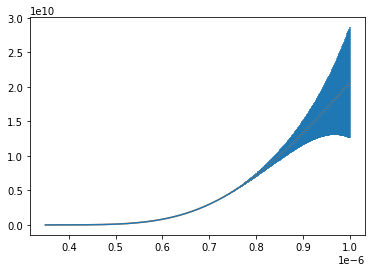

In [16]:
plt.errorbar(WL,y,yerr = PlancksTempErr(WL,temps[i],tempsErr[i]))
plt.plot(WL,y)

In [17]:
def Wien(T):
    b = 2.897771e-3 #Wien's displacement constant
    return (b / T)*1e9

Difference: 3.572792e-06
Fitted Temperature: 4286.643468


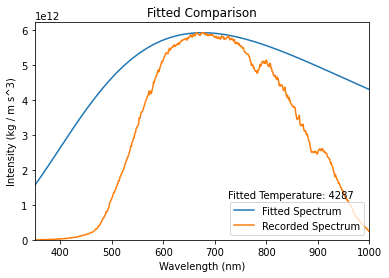

In [18]:
#Fitting first for temperature
# index = -1
center = 2501
gap = 2500
guess = np.linspace(center-gap,center+gap,1000)
lambdaMax = WL[np.argmax(I[0])]*1e9


closest = 1e10
sufficient = False 

while not sufficient:
    for i in range(len(guess)):
        diff = np.abs(lambdaMax - Wien(guess[i]))
        if diff < closest:
            closest = diff
            index = i
    if closest < 1e-5:
        sufficient = True
    else:
        center = guess[index]
        gap /= 10
        guess = np.linspace(center-gap, center+gap,1000)
print('Difference: {:e}'.format(closest))
print('Fitted Temperature: {:.6f}'.format(guess[index]))

y = PlancksLaw(WL, guess[index])
plt.plot(WL*1e9,y, label='Fitted Spectrum')
plt.plot(WL*1e9,I[0]*max(y)/max(I[0]), label='Recorded Spectrum')
plt.legend(loc='lower right')
plt.title('Fitted Comparison')
plt.xlabel('Wavelength (nm)')
plt.xlim(WL[0]*1e9,1000)
plt.ylim(0,max(y)*1.05)
plt.ylabel('Intensity (kg / m s^3)')
plt.text(725,1.2e12,'Fitted Temperature: {:.0f}'.format(guess[index]),ha='left');
#plt.savefig('Fitted Comparison.png',format='png');

Going to compare the peaks of all the curves

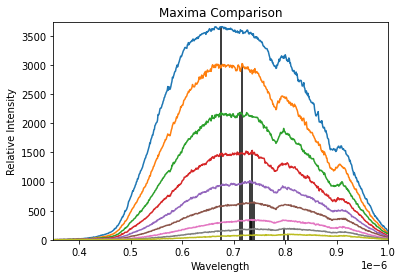

In [26]:
for i in range(len(I)-1):
    plt.plot(WL,I[i],label='Temperature {:.0f} K'.format(temps[i]))
    plt.vlines(x=WL[np.argmax(I[i])],ymin=0,ymax=np.max(I[i]),color='black')
plt.xlim(WL[0],WL[-1])
plt.ylim(0,np.max(I[0])*1.02)
plt.title('Maxima Comparison')
plt.xlabel('Wavelength')
plt.ylabel('Relative Intensity')
plt.savefig('Maxima Comparison.png',format='png')